##### Universidad Autonoma de Aguascalientes
##### Centro de Ciencias Básicas
##### Ingenieria en Computacion Inteligente
##### Departamento de Ciencias de la Computación
##### Aprendizaje Inteligente
##### Actividad de Modelo Discriminante Gaussiano
##### Integrantes:
#####    Arriaga Ramírez Juan Manuel
#####    Cadengo Rodriguez Gillbran
#####    Jimenez Medina Alan Noe
#####    Pérez Moreno Sergio Gabriel

Importamos todas las librerias

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

Creamos un conjunto de datos aleatorio

In [31]:
np.random.seed(42)
num_observaciones = 1000
mean_class1 = [0, 0]
cov_class1 = [[1, 0.5], [0.5, 1]]
mean_class2 = [1, 1]
cov_class2 = [[1, 0], [0, 1]]
X_class1 = np.random.multivariate_normal(mean_class1, cov_class1, num_observaciones//2)
X_class2 = np.random.multivariate_normal(mean_class2, cov_class2, num_observaciones//2)
X = np.concatenate([X_class1, X_class2])
y = np.concatenate([np.zeros(num_observaciones//2), np.ones(num_observaciones//2)])

Creamos un DataFrame de Pandas

In [32]:
df = pd.DataFrame(X, columns = ['feature1', 'feature2'])
df['target'] = y

Dividimos los conjuntos de datos para entrenamiento y prueba

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Inicializamos y entrenamos el modelo de discriminante gaussiano

In [34]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

Realizar y calcular predicciones del conjunto de pruebas

In [35]:
y_pred = lda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precision del modelo: ", accuracy)

Precision del modelo:  0.755


Calcular la matriz de confusion

In [36]:
matriz_de_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de confusion:")
print(matriz_de_confusion)

Matriz de confusion:
[[72 24]
 [25 79]]


Calcular indices de calidad de prediccion

In [37]:
def indices(matriz_de_confusion, nombres = None):    
    precision_global = accuracy_score(y_test, y_pred)
    error_global = 1- precision_global
    precision_positiva = matriz_de_confusion[1, 1] / (matriz_de_confusion[1, 1] + matriz_de_confusion[1, 0])
    precision_negativa = matriz_de_confusion[0, 0] / (matriz_de_confusion[0, 0] + matriz_de_confusion[0, 1])
    falsos_positivos = matriz_de_confusion[0, 1] / (matriz_de_confusion[0, 0] + matriz_de_confusion[0, 1])
    falsos_negativos = matriz_de_confusion[1, 0] / (matriz_de_confusion[1, 1] + matriz_de_confusion[1, 0])
    asertividad_positiva = matriz_de_confusion[1, 1] / (matriz_de_confusion[1, 1] + matriz_de_confusion[0, 1])
    asertividad_negativa = matriz_de_confusion[0, 0] / (matriz_de_confusion[0, 0] + matriz_de_confusion[1, 0])

    precision_categoria = pd.DataFrame(matriz_de_confusion.diagonal()/np.sum(matriz_de_confusion, axis = 1)).T
    if nombres != None:
        precision_categoria.columns = nombres
        lista = [precision_global, error_global, precision_positiva, precision_negativa, falsos_positivos, falsos_negativos, asertividad_positiva, asertividad_negativa]
        return lista

In [38]:
indices1 = indices(matriz_de_confusion, list(np.unique(y)))

In [39]:
table_header = ["Modelo", "Precision Global", "Error Global", "Precision Positiva", "Precision Negativa", 
                "Falsos Positivos", "Falsos Negativos", "Asertividad Positiva", "Asertividad Negativa"]
table_data = [
    ["Discriminante Gaussiano"] + list(indices1),
]

print("\nTabla de rendimiento:")
print("-" * 200)
print("{:<20} {:<18} {:<14} {:<20} {:<20} {:<20} {:<20} {:<23} {:<23}".format(*table_header))
print("-" * 200)
for row in table_data:
    print("{:<20} {:<18.2f} {:<14.2f} {:<20.2f} {:<20.2f} {:<20} {:<20} {:<23.2f} {:<23.2f}".format(*row))
print("-" * 200)


Tabla de rendimiento:
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Modelo               Precision Global   Error Global   Precision Positiva   Precision Negativa   Falsos Positivos     Falsos Negativos     Asertividad Positiva    Asertividad Negativa   
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Discriminante Gaussiano 0.76               0.24           0.76                 0.75                 0.25                 0.2403846153846154   0.77                    0.74                   
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Obtener probabilidades de las clases y calcular curva ROC y el area bajo la curva

Area bajo la curva:  0.8438501602564104


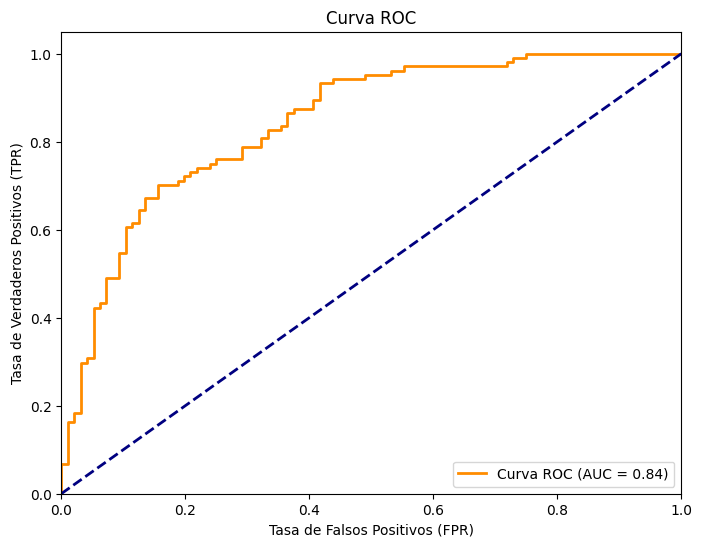

In [40]:
y_score = lda.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ", roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Conclusiones y bibliografias